In [2]:
#loading the cleaned dataset

import pandas as pd 

df = pd.read_csv('cleaned_loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,monthly_income,monthly_payment_est,payment_to_income,age_bucket,credit_bucket
0,31.0,male,Bachelor,96852.0,10,MORTGAGE,5000.0,PERSONAL,6.91,0.05,9.0,682,1,0,8071.000000,28.791667,0.003567,26–35,Good
1,29.0,female,High School,96737.0,6,MORTGAGE,6000.0,DEBTCONSOLIDATION,7.14,0.06,8.0,519,0,0,8061.416667,35.700000,0.004429,26–35,Fair
2,32.0,male,Bachelor,96948.0,6,MORTGAGE,12000.0,DEBTCONSOLIDATION,12.68,0.12,10.0,668,1,0,8079.000000,126.800000,0.015695,26–35,Good
3,29.0,female,Associate,96865.0,4,MORTGAGE,20000.0,VENTURE,14.96,0.21,10.0,679,0,0,8072.083333,249.333333,0.030888,26–35,Good
4,33.0,female,Bachelor,96986.0,15,MORTGAGE,8000.0,EDUCATION,20.00,0.08,5.0,667,0,0,8082.166667,133.333333,0.016497,26–35,Good


In [3]:
#understand target distribution

df['loan_status'].value_counts(normalize=True).round(3)


loan_status
0    0.78
1    0.22
Name: proportion, dtype: float64

In [4]:
#Identify Numeric & Categorical Columns

num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

num_cols, cat_cols


(['person_age',
  'person_income',
  'person_emp_exp',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_cred_hist_length',
  'credit_score',
  'previous_loan_defaults_on_file',
  'loan_status',
  'monthly_income',
  'monthly_payment_est',
  'payment_to_income'],
 ['person_gender',
  'person_education',
  'person_home_ownership',
  'loan_intent',
  'age_bucket',
  'credit_bucket'])

In [5]:
#Split Data into Train / Validation / Test Sets

from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# First split: Training vs temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Second split: validation vs test (50% of temp each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

X_train.shape, X_val.shape, X_test.shape


((13999, 18), (3000, 18), (3000, 18))

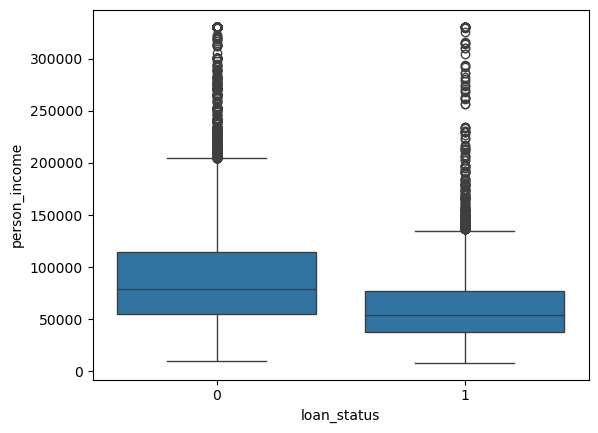

In [6]:
#Quick Visual Checks Before Modeling (1) Numeric vs target (boxplot)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='loan_status', y='person_income')
plt.show()


In [7]:
#(2) Categorical vs target

pd.crosstab(df['loan_intent'], df['loan_status'], normalize='index').round(3)


loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.672,0.328
EDUCATION,0.829,0.171
HOMEIMPROVEMENT,0.778,0.222
MEDICAL,0.710,0.290
PERSONAL,0.810,0.190
VENTURE,0.875,0.125


In [10]:
print(X_train.shape)
print(y_train.shape)



(13999, 18)
(13999,)


In [22]:
X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)



In [23]:
import os
os.listdir("data")

['.ipynb_checkpoints',
 'X_test.csv',
 'X_train.csv',
 'X_val.csv',
 'y_test.csv',
 'y_train.csv',
 'y_val.csv']